In [1]:
import zeus21
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

import hmf
from hmf import MassFunction, Transfer   

import sys
sys.path.append('../21cm_ETHOS/21cmFAST-ethos-analysis-main/')
import sheth_tormen as st

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as P15
from astropy import constants as const
import astropy.units as u

In [2]:
#Cosmology

omega_cdm = 0.12#0.1411027587
CosmoParams_input = zeus21.Cosmo_Parameters_Input(omegac = omega_cdm)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo)
corrf = zeus21.Correlations(parcos,ClassyCosmo)
hmfint = zeus21.HMF_interpolator(parcos,ClassyCosmo)

#Astrophysics

eps_star = 0.15
parastro = zeus21.Astro_Parameters(parcos, epsstar=eps_star)

#Temperature

T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint, zmin=12) 

In [3]:
eth = zeus21.ETHOS(parcos, ClassyCosmo, corrf, cosmo=P15, use_hmf=False)

In [4]:
eth.sigma2_M(hmfint.Mhtab)

array([5.55124961, 5.55124961, 5.5512496 , 5.55124959, 5.55124958,
       5.55124954, 5.55124947, 5.55124932, 5.55124902, 5.55124838,
       5.55124705, 5.55124429, 5.55123855, 5.55122664, 5.55120187,
       5.55115042, 5.55104349, 5.55082133, 5.5503598 , 5.54940123,
       5.54741145, 5.54328595, 5.53475284, 5.51719036, 5.48140832,
       5.40997441, 5.27289563, 5.02813335, 4.63948003, 4.11372239,
       3.51503654, 2.92235085, 2.38432972, 1.9173056 , 1.521328  ])

In [5]:
#21 cm power spectrum

powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
klist = powerspec21.klist_PS
zlist = T21_coeff.zintegral


In [6]:
klist

array([4.04136295e-04, 4.87969699e-04, 5.89193375e-04, 7.11414732e-04,
       8.58989498e-04, 1.03717694e-03, 1.25232732e-03, 1.51210815e-03,
       1.82577751e-03, 2.20451396e-03, 2.66181491e-03, 3.21397765e-03,
       3.88068018e-03, 4.68568245e-03, 5.65767313e-03, 6.83129204e-03,
       8.24836464e-03, 9.95939258e-03, 1.20253535e-02, 1.45198741e-02,
       1.75318542e-02, 2.11686348e-02, 2.55598235e-02, 3.08619136e-02,
       3.72638609e-02, 4.49938183e-02, 5.43272660e-02, 6.55968296e-02,
       7.92041340e-02, 9.56341164e-02, 1.15472309e-01, 1.39425705e-01,
       1.68347956e-01, 2.03269795e-01, 2.45435765e-01, 2.96348578e-01,
       3.57822667e-01, 4.32048844e-01, 5.21672385e-01, 6.29887293e-01,
       7.60550134e-01, 9.18317471e-01, 1.10881182e+00, 1.33882202e+00,
       1.61654518e+00])

In [7]:
powerspec21.klist_PS

array([4.04136295e-04, 4.87969699e-04, 5.89193375e-04, 7.11414732e-04,
       8.58989498e-04, 1.03717694e-03, 1.25232732e-03, 1.51210815e-03,
       1.82577751e-03, 2.20451396e-03, 2.66181491e-03, 3.21397765e-03,
       3.88068018e-03, 4.68568245e-03, 5.65767313e-03, 6.83129204e-03,
       8.24836464e-03, 9.95939258e-03, 1.20253535e-02, 1.45198741e-02,
       1.75318542e-02, 2.11686348e-02, 2.55598235e-02, 3.08619136e-02,
       3.72638609e-02, 4.49938183e-02, 5.43272660e-02, 6.55968296e-02,
       7.92041340e-02, 9.56341164e-02, 1.15472309e-01, 1.39425705e-01,
       1.68347956e-01, 2.03269795e-01, 2.45435765e-01, 2.96348578e-01,
       3.57822667e-01, 4.32048844e-01, 5.21672385e-01, 6.29887293e-01,
       7.60550134e-01, 9.18317471e-01, 1.10881182e+00, 1.33882202e+00,
       1.61654518e+00])

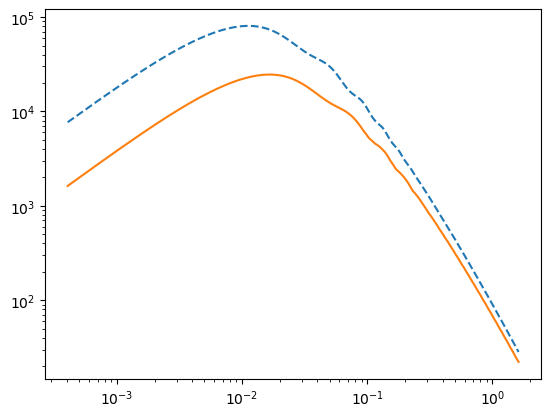

In [8]:
fig, ax = plt.subplots()  
kklist = np.linspace(4.04136295e-04, 1.61654518e+00, 10000)
ax.loglog(kklist, eth.PklinCF, '--' )
ax.loglog(kklist, eth.Pk_LCDM(kklist),'-')



In [9]:
powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
klist = powerspec21.klist_PS
zlist = T21_coeff.zintegral

In [10]:
klist

array([4.04136295e-04, 4.87969699e-04, 5.89193375e-04, 7.11414732e-04,
       8.58989498e-04, 1.03717694e-03, 1.25232732e-03, 1.51210815e-03,
       1.82577751e-03, 2.20451396e-03, 2.66181491e-03, 3.21397765e-03,
       3.88068018e-03, 4.68568245e-03, 5.65767313e-03, 6.83129204e-03,
       8.24836464e-03, 9.95939258e-03, 1.20253535e-02, 1.45198741e-02,
       1.75318542e-02, 2.11686348e-02, 2.55598235e-02, 3.08619136e-02,
       3.72638609e-02, 4.49938183e-02, 5.43272660e-02, 6.55968296e-02,
       7.92041340e-02, 9.56341164e-02, 1.15472309e-01, 1.39425705e-01,
       1.68347956e-01, 2.03269795e-01, 2.45435765e-01, 2.96348578e-01,
       3.57822667e-01, 4.32048844e-01, 5.21672385e-01, 6.29887293e-01,
       7.60550134e-01, 9.18317471e-01, 1.10881182e+00, 1.33882202e+00,
       1.61654518e+00])

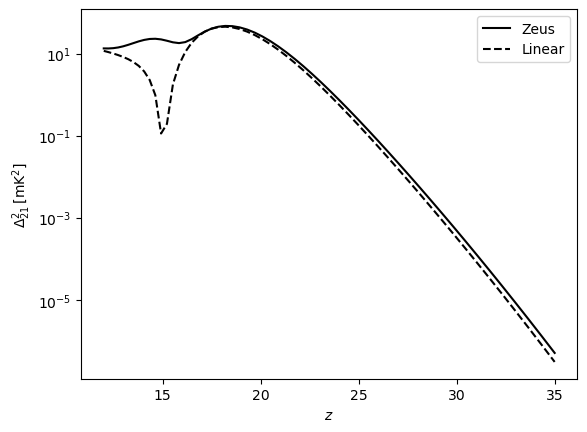

In [11]:
fig, ax = plt.subplots()  

kchoose=0.2;
_ik = min(range(len(klist)), key=lambda i: np.abs(klist[i]-kchoose))

ax.plot(zlist, powerspec21.Deltasq_T21[:,_ik],'k',label='Zeus')
ax.plot(zlist, powerspec21.Deltasq_T21_lin[:,_ik],'k--',label='Linear')
plt.yscale('log')


plt.xlabel(r'$z$');
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');
plt.legend()


#plt.ylim([1,4e2])
#plt.xlim([12, 35])

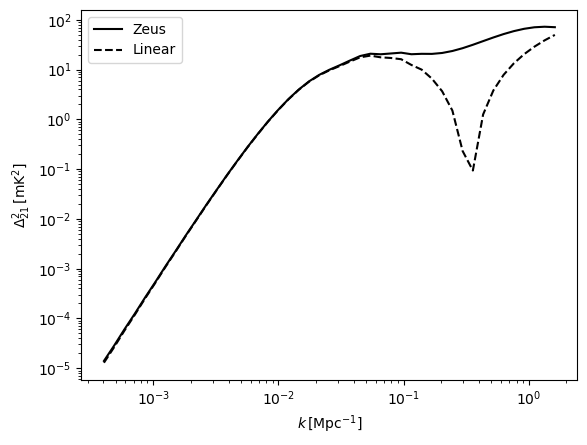

In [12]:
fig2, ax2 = plt.subplots()  

zchoose=14.;
_iz = min(range(len(zlist)), key=lambda i: np.abs(zlist[i]-zchoose))

ax2.plot(klist, powerspec21.Deltasq_T21[_iz],'k',label='Zeus')
ax2.plot(klist, powerspec21.Deltasq_T21_lin[_iz],'k--',label='Linear')

plt.xscale('log')
plt.yscale('log')

plt.legend()


plt.xlabel(r'$k\,\rm [Mpc^{-1}]$');
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');

#plt.ylim([3e-3,1e2])


In [13]:
zchoose=10
_iz = min(range(len(zlist)), key=lambda i: np.abs(zlist[i]-zchoose))

(1e-18, 0.0001)

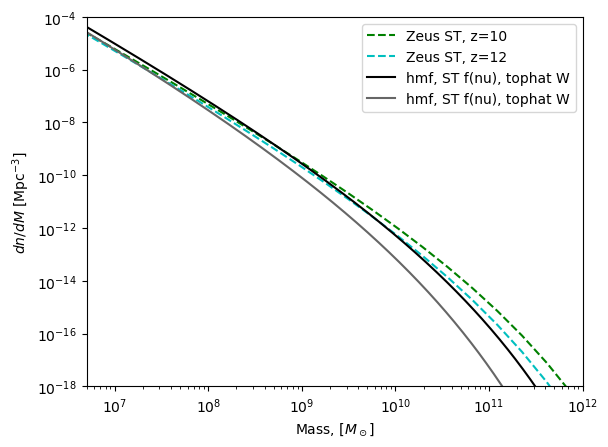

In [14]:
#True HMF
mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
fig4, ax4 = plt.subplots()

ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus ST, z=10') 
ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus ST, z=12') 

plt.xscale('log')
plt.yscale('log')
ax4.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax4.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W')

ax4.legend()
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]");

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-18,1e-4])


(1e-18, 0.0001)

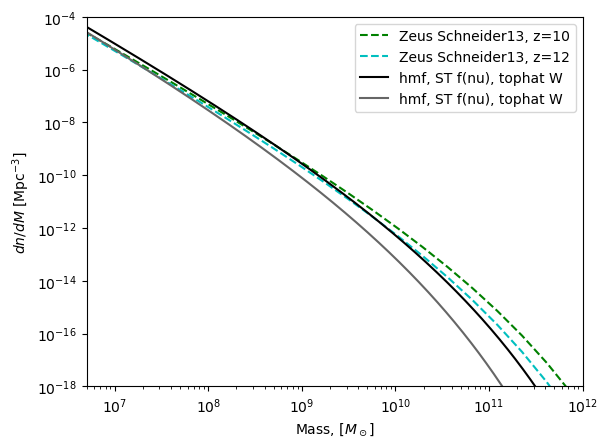

In [15]:
#True HMF
mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
fig4, ax4 = plt.subplots()

ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus Schneider13, z=10') 
ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus Schneider13, z=12') 

plt.xscale('log')
plt.yscale('log')
ax4.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax4.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W')

ax4.legend()
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]");

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-18,1e-4])


(1e-18, 0.0001)

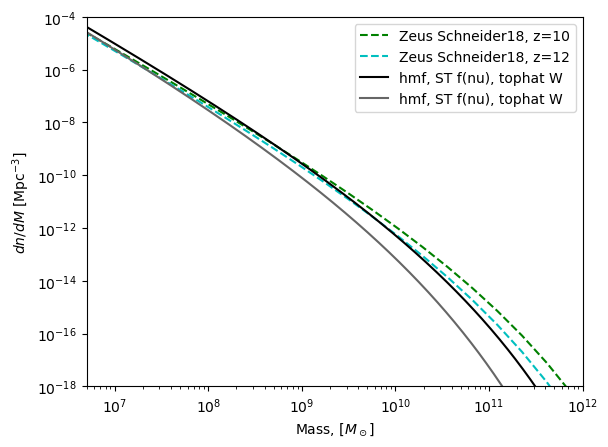

In [16]:
#True HMF

mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
fig4, ax4 = plt.subplots()

ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus Schneider18, z=10') 
ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus Schneider18, z=12') 

plt.xscale('log')
plt.yscale('log')
ax4.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax4.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W')

ax4.legend()
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]");

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-18,1e-4])


In [17]:
def resolution(M):
    rho=8.622899e+10
    return (3*M/(4*np.pi*rho))**(1/3)

RR=resolution(hmfint.Mhtab)

RR-hmfint.RMhtab

array([-0.001933  , -0.00236846, -0.00290203, -0.0035558 , -0.00435685,
       -0.00533836, -0.00654098, -0.00801453, -0.00982005, -0.0120323 ,
       -0.01474294, -0.01806423, -0.02213373, -0.02712002, -0.03322961,
       -0.04071557, -0.04988797, -0.06112673, -0.07489735, -0.09177021,
       -0.11244419, -0.1377756 , -0.16881367, -0.20684399, -0.25344178,
       -0.3105371 , -0.38049486, -0.46621269, -0.57124101, -0.69993011,
       -0.85761026, -1.05081258, -1.28753949, -1.5775962 , -1.93299685])

In [18]:
zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,10],hmfint.dsigmadMMhtab[:,10])

array([5.85415377e-02, 1.78283920e-02, 5.43779414e-03, 1.63302694e-03,
       4.86104886e-04, 1.43195024e-04, 4.18054103e-05, 1.20898859e-05,
       3.46096799e-06, 9.79798259e-07, 2.73913097e-07, 7.54754417e-08,
       2.04490217e-08, 5.43146982e-09, 1.40909742e-09, 3.55445565e-10,
       8.66926515e-11, 2.03030761e-11, 4.52656002e-12, 9.50428394e-13,
       1.85405208e-13, 3.30299044e-14, 5.25702689e-15, 7.26692819e-16,
       8.41045398e-17, 7.76797709e-18, 5.37383587e-19, 2.55866620e-20,
       7.48119947e-22, 1.14988729e-23, 7.49880772e-26, 1.53843520e-28,
       6.50542559e-32, 3.09352482e-36, 6.85857680e-42])

In [19]:
h = 0.675
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.daw"
#hmf_P15   = st.HMF(cosmo=P15, use_hmf=True)
cosmoSw = FlatLambdaCDM(H0=100*h, Om0=(0.1201075+0.0223828)/h**2., Ob0=0.0223828/h**2.)

#st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000)


hmf_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=False, window_function = 'TopHat' ,f_params='ST') #same as zeus f_parsm 
eth = zeus21.ETHOS(parcos, ClassyCosmo, corrf, cosmo=P15,  use_hmf=False, logk=False, window_function = 'TopHat' ,f_params='ST')

mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12)



# Sheth Tormen, tophat
#hmf_P15.window_function = 'TopHat'
#hmf_P15.f_params = 'ST'

#True HMF



hmfz12 = zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,12],hmfint.dsigmadMMhtab[:,12])

hmfz10 = zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,10],hmfint.dsigmadMMhtab[:,10])



Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using TopHat window function
Using ST f(sigma) params


In [20]:
mf_z12.m

array([1.00000000e+06, 1.02329299e+06, 1.04712855e+06, 1.07151931e+06,
       1.09647820e+06, 1.12201845e+06, 1.14815362e+06, 1.17489755e+06,
       1.20226443e+06, 1.23026877e+06, 1.25892541e+06, 1.28824955e+06,
       1.31825674e+06, 1.34896288e+06, 1.38038426e+06, 1.41253754e+06,
       1.44543977e+06, 1.47910839e+06, 1.51356125e+06, 1.54881662e+06,
       1.58489319e+06, 1.62181010e+06, 1.65958691e+06, 1.69824365e+06,
       1.73780083e+06, 1.77827941e+06, 1.81970086e+06, 1.86208714e+06,
       1.90546072e+06, 1.94984460e+06, 1.99526231e+06, 2.04173794e+06,
       2.08929613e+06, 2.13796209e+06, 2.18776162e+06, 2.23872114e+06,
       2.29086765e+06, 2.34422882e+06, 2.39883292e+06, 2.45470892e+06,
       2.51188643e+06, 2.57039578e+06, 2.63026799e+06, 2.69153480e+06,
       2.75422870e+06, 2.81838293e+06, 2.88403150e+06, 2.95120923e+06,
       3.01995172e+06, 3.09029543e+06, 3.16227766e+06, 3.23593657e+06,
       3.31131121e+06, 3.38844156e+06, 3.46736850e+06, 3.54813389e+06,
      

(1e-13, 1000.0)

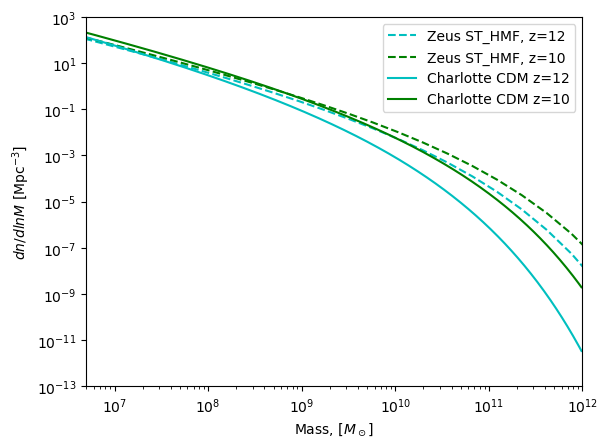

In [21]:
fig5, ax5 = plt.subplots()
# hmf
#ax5.plot(mf_z5.m, mf_z5.dndm, '--', label='hmf, z=12')
ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfz12,'c--',label='Zeus ST_HMF, z=12')
#ax5.plot(mf_z10.m, mf_z10.dndm, '-', label='hmf, z=10')
ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfz10,'g--',label='Zeus ST_HMF, z=10')

ax5.plot(mf_z12.m, hmf_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=True), 
          'c-', label='Charlotte CDM z=12') 
ax5.plot(mf_z10.m, hmf_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=True), 
          'g-', label='Charlotte CDM z=10') 



plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/dln{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-13,1e3])
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-12,1e-6])

(1e-13, 1000.0)

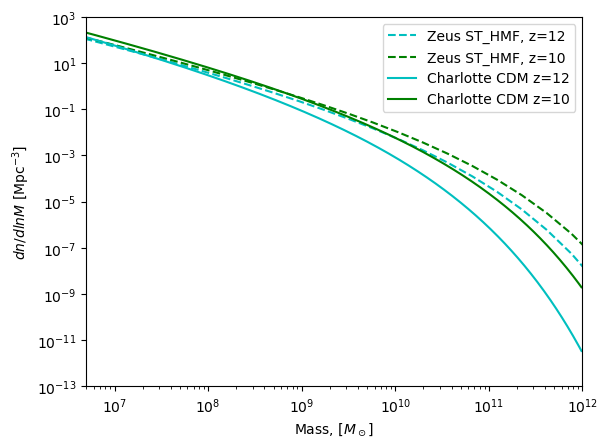

In [22]:
fig5, ax5 = plt.subplots()

mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)

# hmf

ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfint.HMFtab[:,12],'c--',label='Zeus ST_HMF, z=12')

ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfint.HMFtab[:,10],'g--',label='Zeus ST_HMF, z=10')

ax5.plot(mf_z12.m, hmf_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=True), 
          'c-', label='Charlotte CDM z=12') 
ax5.plot(mf_z10.m, hmf_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=True), 
          'g-', label='Charlotte CDM z=10') 


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/dln{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-13,1e3])
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-12,1e-6])

(1e-22, 0.001)

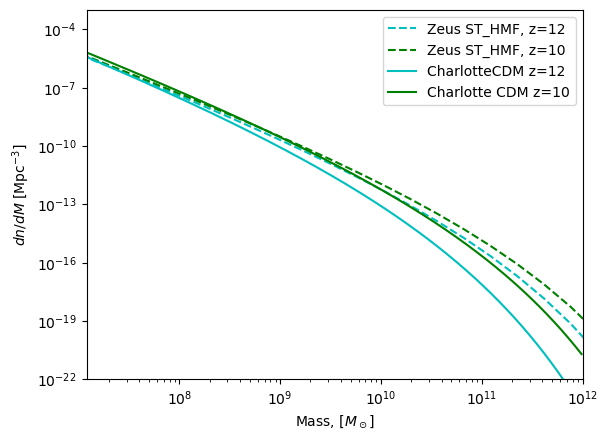

In [23]:
fig5, ax5 = plt.subplots()

mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)

# hmf

ax5.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus ST_HMF, z=12')

ax5.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus ST_HMF, z=10')

ax5.plot(mf_z12.m, hmf_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=True)/mf_z12.m, 
          'c-', label='CharlotteCDM z=12') 
ax5.plot(mf_z10.m, hmf_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=True)/mf_z10.m, 
          'g-', label='Charlotte CDM z=10') 


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([12*1e6, 1e12])
plt.ylim([1e-22,1e-3])
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-12,1e-6])

In [24]:
h_peak = 0.8
k_peak = 300
#zeus21.h2func(100, zeus21.h_models[h_peak]['h2func'])

In [25]:
kmin, kmax = 1.1e-12,2000
kk = np.linspace(kmin,kmax,100)

In [26]:
trans=zeus21.T_ETHOS(kk, k_peak, h_peak, c=-20)

In [27]:
trans

array([9.99996667e-01, 9.99719810e-01, 9.95719979e-01, 9.78599759e-01,
       9.33799077e-01, 8.45195978e-01, 7.02413751e-01, 5.09496385e-01,
       2.87259505e-01, 6.22067839e-02, 1.51457103e-01, 3.56603425e-01,
       5.56403587e-01, 7.35096771e-01, 8.58760115e-01, 8.95533868e-01,
       8.37725205e-01, 7.08746508e-01, 5.47903370e-01, 3.81717121e-01,
       2.06259670e-01, 1.33491153e-03, 2.36120445e-01, 4.78044943e-01,
       6.84961251e-01, 8.31727433e-01, 9.12901141e-01, 9.32759178e-01,
       8.96762297e-01, 8.09876341e-01, 6.78007320e-01, 5.09198250e-01,
       3.13924458e-01, 1.04802997e-01, 1.04060731e-01, 2.98037550e-01,
       4.63224294e-01, 5.87886965e-01, 6.63908418e-01, 6.87969954e-01,
       6.62172576e-01, 5.93868215e-01, 4.94625422e-01, 3.78462700e-01,
       2.59681636e-01, 1.50751449e-01, 6.06895199e-02, 5.75361893e-03,
       4.80163423e-02, 6.88962032e-02, 7.32749198e-02, 6.67611944e-02,
       5.45608720e-02, 4.07564939e-02, 2.80313462e-02, 1.77555656e-02,
      

In [28]:

hmfint.sigmaMhtab[:,0]

array([2.377598  , 2.30449891, 2.22966854, 2.15339898, 2.07652152,
       1.99940386, 1.92241988, 1.84583615, 1.76985043, 1.69461288,
       1.62023779, 1.54681612, 1.47442282, 1.40312287, 1.3329751 ,
       1.26403499, 1.19635646, 1.12999314, 1.0649992 , 1.00142999,
       0.93934248, 0.87879548, 0.81984967, 0.76256766, 0.70701394,
       0.65325471, 0.60135753, 0.5513911 , 0.50342469, 0.45752748,
       0.41376763, 0.37221117, 0.33292055, 0.29595298, 0.2613584 ])

In [29]:
hmfint.dsigmadMMhtab[:,0]

array([-1.18611167e-06, -6.59090924e-07, -3.67206986e-07, -2.01965525e-07,
       -1.10467322e-07, -6.00534160e-08, -3.25283996e-08, -1.75668614e-08,
       -9.46459811e-09, -5.09002633e-09, -2.73332866e-09, -1.46592554e-09,
       -7.85296162e-10, -4.20226511e-10, -2.24630880e-10, -1.19945611e-10,
       -6.39748659e-11, -3.40815691e-11, -1.81334097e-11, -9.63488865e-12,
       -5.11178036e-12, -2.70769802e-12, -1.43175163e-12, -7.55620003e-13,
       -3.97949015e-13, -2.09098226e-13, -1.09590230e-13, -5.72768030e-14,
       -2.98431438e-14, -1.54962849e-14, -8.01621685e-15, -4.12946365e-15,
       -2.11740715e-15, -1.08015390e-15, -5.47896908e-16])

In [30]:
eth.Pk_ETHOS(0.4,100,c=-20)

<function zeus21.cosmology.ETHOS.Pk_ETHOS.<locals>.<lambda>(k)>

In [31]:
len(eth.sigma2_M(hmfint.Mhtab))

35

In [32]:
eth.dN_dlnM

<bound method ETHOS.dN_dlnM of <zeus21.cosmology.ETHOS object at 0x7f99e97ad330>>

In [33]:
sigma_12 = np.sqrt(hmf_P15.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
sigma_10= np.sqrt(hmf_P15.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)
sigma_12_eth = np.sqrt(eth.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
sigma_10_eth = np.sqrt(eth.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)
sigma = np.sqrt(hmf_P15.sigma2_M(hmfint.Mhtab, LCDM=True))
sigma_eth = np.sqrt(eth.sigma2_M(hmfint.Mhtab, LCDM=True))
dsigma2_12 = np.sqrt(hmf_P15.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
dsigma2_10= np.sqrt(hmf_P15.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)
dsigma2_12_eth = np.sqrt(eth.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
dsigma2_10_eth = np.sqrt(eth.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)


/var/folders/zb/pjb0r29j7fs0t9ft3gnprvdr0000gn/T/ipykernel_1977/1841422329.py:7: RuntimeWarning: invalid value encountered in sqrt
  dsigma2_12 = np.sqrt(hmf_P15.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
/var/folders/zb/pjb0r29j7fs0t9ft3gnprvdr0000gn/T/ipykernel_1977/1841422329.py:8: RuntimeWarning: invalid value encountered in sqrt
  dsigma2_10= np.sqrt(hmf_P15.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)
/var/folders/zb/pjb0r29j7fs0t9ft3gnprvdr0000gn/T/ipykernel_1977/1841422329.py:9: RuntimeWarning: invalid value encountered in sqrt
  dsigma2_12_eth = np.sqrt(eth.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
/var/folders/zb/pjb0r29j7fs0t9ft3gnprvdr0000gn/T/ipykernel_1977/1841422329.py:10: RuntimeWarning: invalid value encountered in sqrt
  dsigma2_10_eth = np.sqrt(eth.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)


In [34]:
hmf_P15.sigma2_M(hmfint.Mhtab)

array([36.29189302, 36.23631395, 36.15356018, 36.0308434 , 35.8499482 ,
       35.58560652, 35.20414233, 34.66333702, 33.91510385, 32.9127984 ,
       31.62371666, 30.04360553, 28.20548872, 26.17530936, 24.03520439,
       21.86439682, 19.72717662, 17.66962557, 15.72162298, 13.90061037,
       12.21523271, 10.66821057,  9.2583946 ,  7.98215938,  6.83431375,
        5.80866635,  4.8983936 ,  4.09627435,  3.3948312 ,  2.78643421,
        2.26339719,  1.81805116,  1.44281126,  1.13022756,  0.87304305])

In [35]:
eth.sigma2_M(hmfint.Mhtab)

In [ ]:
hmf_P15.growth_fac

<bound method HMF.growth_fac of <sheth_tormen.st_hmf.HMF object at 0x7f8bf8d248e0>>

In [ ]:
hmf_P15.sigma2_M(hmfint.Mhtab)

array([36.29189302, 36.23631395, 36.15356018, 36.0308434 , 35.8499482 ,
       35.58560652, 35.20414233, 34.66333702, 33.91510385, 32.9127984 ,
       31.62371666, 30.04360553, 28.20548872, 26.17530936, 24.03520439,
       21.86439682, 19.72717662, 17.66962557, 15.72162298, 13.90061037,
       12.21523271, 10.66821057,  9.2583946 ,  7.98215938,  6.83431375,
        5.80866635,  4.8983936 ,  4.09627435,  3.3948312 ,  2.78643421,
        2.26339719,  1.81805116,  1.44281126,  1.13022756,  0.87304305])

In [ ]:
hmfint.sigmaMhtab[0,10]/mf_z10.sigma[0]

1.3410346511394202

Text(0, 0.5, '$\\sigma$')

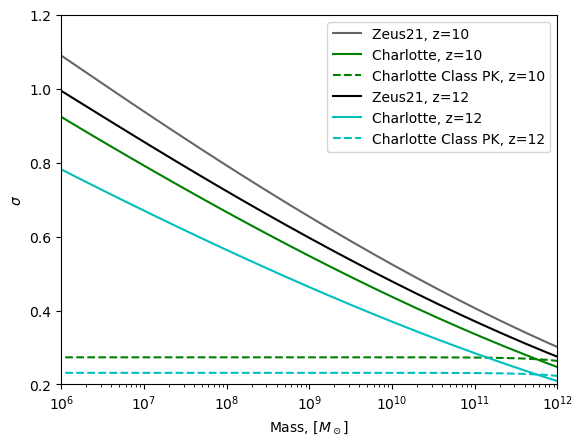

In [ ]:
fig7, ax7 = plt.subplots()

ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,10],c='0.4',label='Zeus21, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10,'g-',label='Charlotte, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10_eth,'g--',label='Charlotte Class PK, z=10' ) 
ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,12],'k-',label='Zeus21, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12,'c-',label='Charlotte, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12_eth,'c--',label='Charlotte Class PK, z=12' ) 
#ax7.plot(mf_z12.m, mf_z12.sigma, c='0.4', label='hmf z=12')
#ax7.plot(mf_z10.m, mf_z10.sigma, 'k-', label='hmf z=10')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

plt.xlim(1e6,1e12)
plt.ylim(0.2,1.2)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$")

Text(0, 0.5, '$\\sigma$')

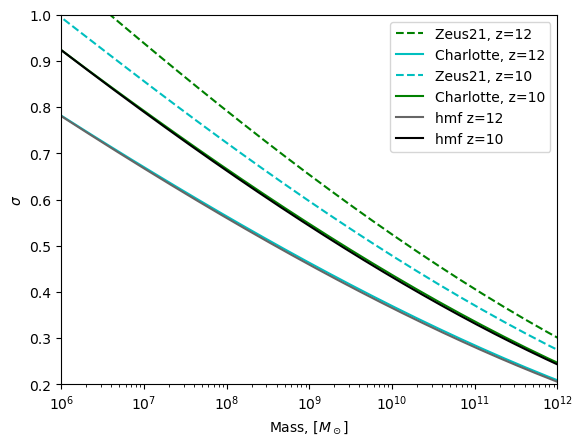

In [ ]:
fig7, ax7 = plt.subplots()

ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,10],'g--',label='Zeus21, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12,'c-',label='Charlotte, z=12' ) 
ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,12],'c--',label='Zeus21, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10,'g-',label='Charlotte, z=10' ) 
ax7.plot(mf_z12.m, mf_z12.sigma, c='0.4', label='hmf z=12')
ax7.plot(mf_z10.m, mf_z10.sigma, 'k-', label='hmf z=10')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

plt.xlim(1e6,1e12)
plt.ylim(0.2,1)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$")

sigma_t

In [ ]:
hmf_P15.dsigma2_dM(hmfint.Mhtab,h_peak=0.0,k_peak=0,LCDM=True)*hmf_P15.growth_fac(12)

array([-8.76218326e-06, -4.91183296e-06, -2.55347263e-06, -1.31026070e-06,
       -6.82246266e-07, -3.51264796e-07, -1.81367275e-07, -9.34129004e-08,
       -4.80774505e-08, -2.47052403e-08, -1.26617356e-08, -6.47130305e-09,
       -3.29871398e-09, -1.67696463e-09, -8.50073802e-10, -4.29626136e-10,
       -2.16447555e-10, -1.08681076e-10, -5.43745891e-11, -2.70998778e-11,
       -1.34507665e-11, -6.64661998e-12, -3.26873789e-12, -1.59924903e-12,
       -7.78079450e-13, -3.76271058e-13, -1.80767913e-13, -8.62258335e-14,
       -4.08118841e-14, -1.91547510e-14, -8.90797271e-15, -4.10138688e-15,
       -1.86781027e-15, -8.40565503e-16, -3.73406545e-16])

In [ ]:
hmfint.dsigmadMMhtab[:,0]

array([-1.18611167e-06, -6.59090924e-07, -3.67206986e-07, -2.01965525e-07,
       -1.10467322e-07, -6.00534160e-08, -3.25283996e-08, -1.75668614e-08,
       -9.46459811e-09, -5.09002633e-09, -2.73332866e-09, -1.46592554e-09,
       -7.85296162e-10, -4.20226511e-10, -2.24630880e-10, -1.19945611e-10,
       -6.39748659e-11, -3.40815691e-11, -1.81334097e-11, -9.63488865e-12,
       -5.11178036e-12, -2.70769802e-12, -1.43175163e-12, -7.55620003e-13,
       -3.97949015e-13, -2.09098226e-13, -1.09590230e-13, -5.72768030e-14,
       -2.98431438e-14, -1.54962849e-14, -8.01621685e-15, -4.12946365e-15,
       -2.11740715e-15, -1.08015390e-15, -5.47896908e-16])

In [ ]:
hmfint.dsigmadMMhtab[:,35]

array([-2.87714838e-07, -1.58770353e-07, -8.80498733e-08, -4.82412854e-08,
       -2.63140399e-08, -1.42759728e-08, -7.72173387e-09, -4.16600218e-09,
       -2.24301805e-09, -1.20572939e-09, -6.47269707e-10, -3.47066886e-10,
       -1.85897122e-10, -9.94674161e-11, -5.31665946e-11, -2.83880166e-11,
       -1.51407540e-11, -8.06583626e-12, -4.29144735e-12, -2.28017067e-12,
       -1.20973543e-12, -6.40791574e-13, -3.38830976e-13, -1.78820807e-13,
       -9.41762667e-14, -4.94839126e-14, -2.59349436e-14, -1.35547692e-14,
       -7.06249057e-15, -3.66725304e-15, -1.89706725e-15, -9.77252793e-16,
       -5.01092244e-16, -2.55622457e-16, -1.29661880e-16])

In [ ]:
eth.dsigma2_dM(hmfint.Mhtab,h_peak=0.4,k_peak=100,LCDM=False)

array([-2.98876674e-07, -3.27170337e-07, -3.48830191e-07, -3.57209671e-07,
       -3.46399198e-07, -3.13406570e-07, -2.57379168e-07, -1.82909962e-07,
       -1.09275445e-07, -5.89131984e-08, -3.46822896e-08, -2.43608221e-08,
       -1.79227024e-08, -1.23103144e-08, -7.69872085e-09, -4.45026207e-09,
       -2.43294516e-09, -1.28283838e-09, -6.61402047e-10, -3.36283301e-10,
       -1.69423192e-10, -8.47901375e-11, -4.22007976e-11, -2.08966345e-11,
       -1.02947638e-11, -5.04484331e-12, -2.45819344e-12, -1.19049485e-12,
       -5.72744820e-13, -2.73572294e-13, -1.29653866e-13, -6.09236227e-14,
       -2.83613289e-14, -1.30689336e-14, -5.95569711e-15])

(1e-22, 0.001)

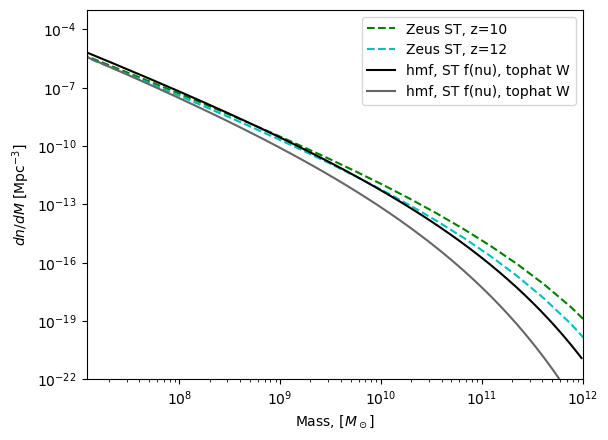

In [ ]:
fig5, ax5 = plt.subplots()



mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)

# hmf
#ax5.plot(mf_z5.m, mf_z5.dndm, '--', label='hmf, z=12')
ax5.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus ST, z=10') 
ax5.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus ST, z=12') 
#ax5.plot(mf_z10.m, mf_z10.dndm, '-', label='hmf, z=10')

ax5.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax5.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W')


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([12*1e6, 1e12])
plt.ylim([1e-22,1e-3])

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider13 f(sigma) params


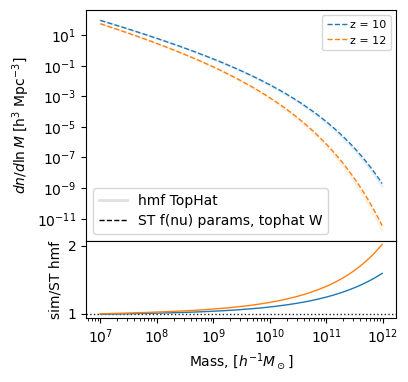

In [ ]:
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='Schneider13')


LCDM = True
z    = 0
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

for z in [10, 12]:
    # hmf
    mf_z = MassFunction(hmf_model='ST', z=z, Mmin=7, Mmax=12, 
                        transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
    ln = ax1.loglog(mf_z.m, mf_z.dndlnm, alpha=0.12)

    # Tophat W(k)
    st_P15.f_params = 'ST'
    st_P15.window_function = 'TopHat'
    hmf_tophat = st_P15.dN_dlnM(mf_z.m, z=z, h_peak=0., k_peak=0., LCDM=LCDM)

    ax1.plot(mf_z.m, hmf_tophat, lw=1, c=ln[0].get_color(), ls='dashed', label=f'z = {z}')
    ax2.plot(mf_z.m, hmf_tophat/mf_z.dndlnm, lw=1, c=ln[0].get_color())

line_hmf    = mlines.Line2D([], [], ls='solid', lw=2, alpha=0.12, c='k', label='hmf TopHat')
line_tophat = mlines.Line2D([], [], ls='dashed', lw=1, c='k', label='ST f(nu) params, tophat W')
leg = ax1.legend(handles=[line_hmf, line_tophat], loc='lower left')
ax1.add_artist(leg)

ax1.legend(loc='upper right', fontsize=8, handletextpad=0.1)
ax2.axhline(1, c='0.12', lw=1, ls='dotted', zorder=0)

ax1.set_xscale('log')
ax1.set_yscale('log')
# ax2.set_ylim(0,10)
# ax1.set_ylim(1e-3,1e3)


fig.subplots_adjust(hspace=0)
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
ax1.set_ylabel(r"$dn/d\ln{M}$ [h$^{3}$ Mpc$^{-3}$]");
ax2.set_ylabel('sim/ST hmf');



Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider13 f(sigma) params


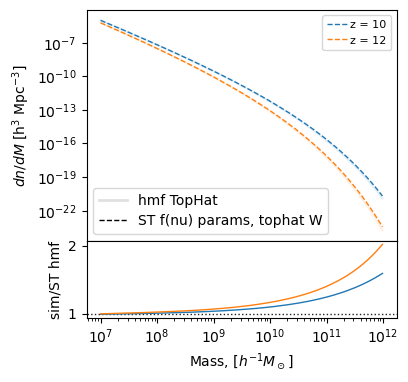

In [ ]:
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='Schneider13')


LCDM = True
z    = 0
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

for z in [10, 12]:
    # hmf
    mf_z = MassFunction(hmf_model='ST', z=z, Mmin=7, Mmax=12, 
                        transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
    ln = ax1.loglog(mf_z.m, mf_z.dndm, alpha=0.12)

    # Tophat W(k)
    st_P15.f_params = 'ST'
    st_P15.window_function = 'TopHat'
    hmf_tophat = st_P15.dN_dlnM(mf_z.m, z=z, h_peak=0., k_peak=0., LCDM=LCDM)

    ax1.plot(mf_z.m, hmf_tophat/mf_z.m, lw=1, c=ln[0].get_color(), ls='dashed', label=f'z = {z}')
    ax2.plot(mf_z.m, hmf_tophat/mf_z.dndlnm, lw=1, c=ln[0].get_color())

line_hmf    = mlines.Line2D([], [], ls='solid', lw=2, alpha=0.12, c='k', label='hmf TopHat')
line_tophat = mlines.Line2D([], [], ls='dashed', lw=1, c='k', label='ST f(nu) params, tophat W')
leg = ax1.legend(handles=[line_hmf, line_tophat], loc='lower left')
ax1.add_artist(leg)

ax1.legend(loc='upper right', fontsize=8, handletextpad=0.1)
ax2.axhline(1, c='0.12', lw=1, ls='dotted', zorder=0)

ax1.set_xscale('log')
ax1.set_yscale('log')
# ax2.set_ylim(0,10)
# ax1.set_ylim(1e-3,1e3)


fig.subplots_adjust(hspace=0)
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
ax1.set_ylabel(r"$dn/d{M}$ [h$^{3}$ Mpc$^{-3}$]");
ax2.set_ylabel('sim/ST hmf');



Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider13 f(sigma) params


(1e-14, 1000.0)

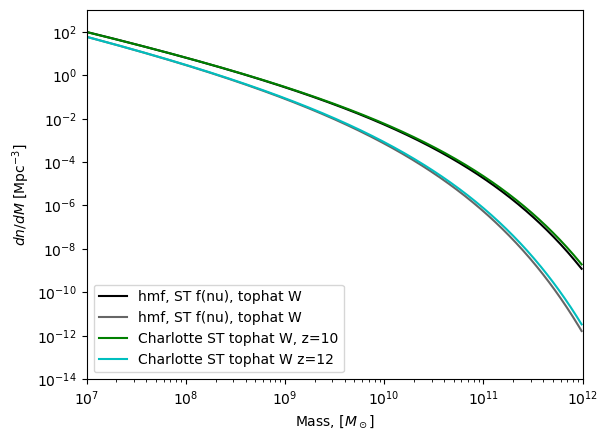

In [ ]:
fig6, ax6 = plt.subplots()
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='Schneider13')
st_P15.f_params = 'ST'
st_P15.window_function = 'TopHat'
hmf_eth_tophat10 = st_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat12 = st_P15.dN_dlnM(mf_z10.m, z=12, h_peak=0., k_peak=0., LCDM=LCDM)
# hmf

ax6.plot(mf_z10.m, mf_z10.dndlnm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax6.plot(mf_z12.m, mf_z12.dndlnm, c='0.4', label='hmf, ST f(nu), tophat W')
ax6.plot(mf_z10.m, hmf_eth_tophat10, 'g-', label='Charlotte ST tophat W, z=10')
ax6.plot(mf_z10.m, hmf_eth_tophat12, 'c-', label='Charlotte ST tophat W z=12')




plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim(1e7, 1e12)
plt.ylim(1e-14,1e3)

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider13 f(sigma) params


(1e-18, 0.0001)

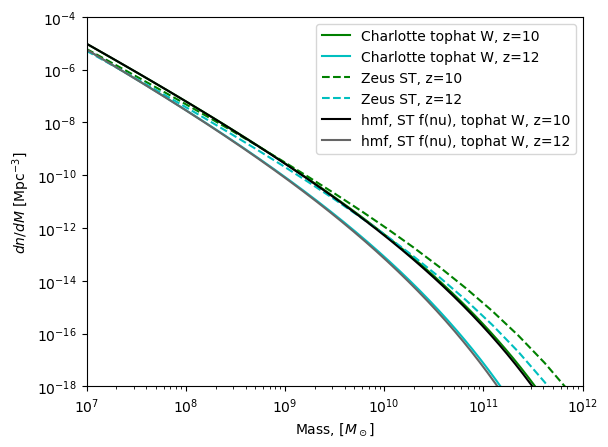

In [ ]:
fig7, ax7 = plt.subplots()
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='Schneider13')
st_P15.f_params = 'ST'
st_P15.window_function = 'TopHat'
hmf_eth_tophat10 = st_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat12 = st_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=LCDM)


# hmf 
ax7.plot(mf_z10.m, hmf_eth_tophat10/mf_z10.m, 'g-', label='Charlotte tophat W, z=10')
ax7.plot(mf_z12.m, hmf_eth_tophat12/mf_z12.m, 'c-',label='Charlotte tophat W, z=12')
ax7.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus ST, z=10') 
ax7.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus ST, z=12') 
ax7.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')
ax7.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W, z=12')


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim(1e7, 1e12)
plt.ylim(1e-18,1e-4)

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider13 f(sigma) params


(5e-13, 2e-05)

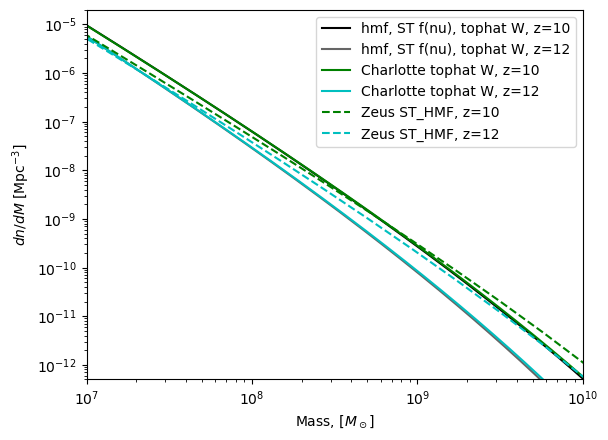

In [ ]:
fig7, ax7 = plt.subplots()
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='Schneider13')
st_P15.f_params = 'ST'
st_P15.window_function = 'TopHat'
hmf_eth_tophat10 = st_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat12 = st_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=LCDM)
# hmf


# hmf
ax7.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')
ax7.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W, z=12')
ax7.plot(mf_z10.m, hmf_eth_tophat10/mf_z10.m, 'g-', label='Charlotte tophat W, z=10')
ax7.plot(mf_z12.m, hmf_eth_tophat12/mf_z12.m, 'c-',label='Charlotte tophat W, z=12')
ax7.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus ST_HMF, z=10')
ax7.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus ST_HMF, z=12')



plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim(1e7, 1e10)
plt.ylim(5e-13,2*1e-5)

Text(0, 0.5, '$\\sigma$')

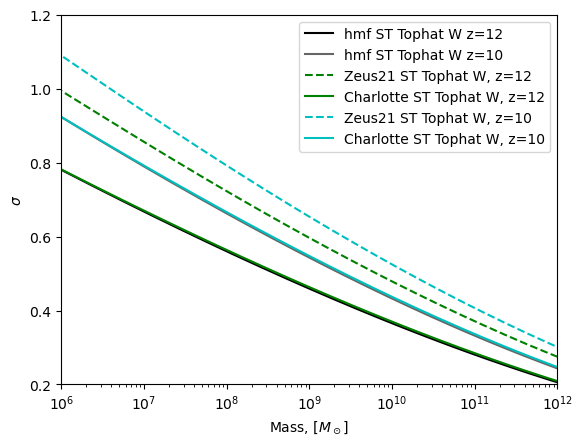

In [ ]:

fig7, ax7 = plt.subplots()

ax7.plot(mf_z12.m, mf_z12.sigma, 'k-', label='hmf ST Tophat W z=12')
ax7.plot(mf_z10.m, mf_z10.sigma, c='0.4', label='hmf ST Tophat W z=10')

ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,12],'g--',label='Zeus21 ST Tophat W, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12,'g-',label='Charlotte ST Tophat W, z=12' ) 
ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,10],'c--',label='Zeus21 ST Tophat W, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10,'c-',label='Charlotte ST Tophat W, z=10' ) 

plt.xscale('log')
#plt.yscale('log')

plt.legend()

plt.xlim(1e6,1e12)
plt.ylim(0.2,1.2)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$")

In [ ]:
len(hmfint.Mhtab)

35

In [ ]:
eth.dsigma2_dM

Text(0, 0.5, '$\\sigma$')

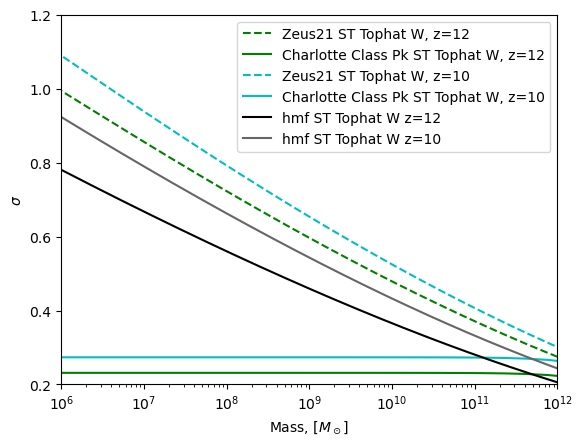

In [ ]:

fig7, ax7 = plt.subplots()



ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,12],'g--',label='Zeus21 ST Tophat W, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12_eth,'g-',label='Charlotte Class Pk ST Tophat W, z=12' ) 
ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,10],'c--',label='Zeus21 ST Tophat W, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10_eth,'c-',label='Charlotte Class Pk ST Tophat W, z=10' ) 
ax7.plot(mf_z12.m, mf_z12.sigma, 'k-', label='hmf ST Tophat W z=12')
ax7.plot(mf_z10.m, mf_z10.sigma, c='0.4', label='hmf ST Tophat W z=10')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

plt.xlim(1e6,1e12)
plt.ylim(0.2,1.2)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$")

NameError: name 'dsigma2_10' is not defined

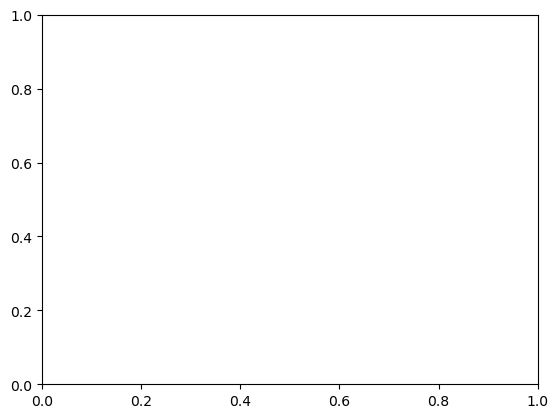

In [ ]:
fig8, ax8 = plt.subplots()


ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10_eth,dsigma2_10/2/sigma_eth),'m-',label='Zeus ST_HMF with Charlotte sigma and dsigma, z=10')
#ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10,hmfint.dsigmadMMhtab[:,10]),'m--',label='Zeus ST_HMF with ethos sigma, z=10')
ax8.plot(hmfint.Mhtab,hmfint.HMFtab[:,10],'g--',label='Zeus ST_HMF, z=10')
ax8.plot(mf_z10.m, hmf_eth_tophat10/mf_z10.m, 'g-', label='Charlotte tophat W, z=10')
#ax8.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
plt.title('LCDM')

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)

(1e-15, 0.0001)

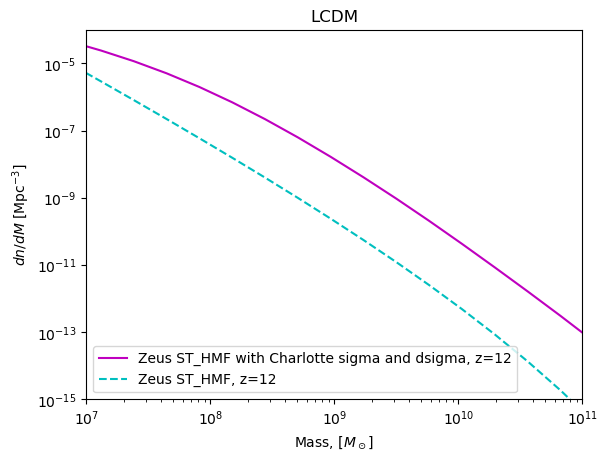

In [ ]:
fig8, ax8 = plt.subplots()


ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_12_eth,dsigma2_12_eth/2/sigma_eth),'m-',label='Zeus ST_HMF with Charlotte sigma and dsigma, z=12')
#ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10,hmfint.dsigmadMMhtab[:,10]),'m--',label='Zeus ST_HMF with Charlotte sigma, z=10')
ax8.plot(hmfint.Mhtab,hmfint.HMFtab[:,12],'c--',label='Zeus ST_HMF, z=12')
#ax8.plot(mf_z12.m, hmf_eth_tophat12/mf_z12.m, 'c-', label='ETHOS tophat W, z=12')
#ax8.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
plt.title('LCDM')

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)

Text(0, 0.5, '$|d\\sigma^2/dM|$')

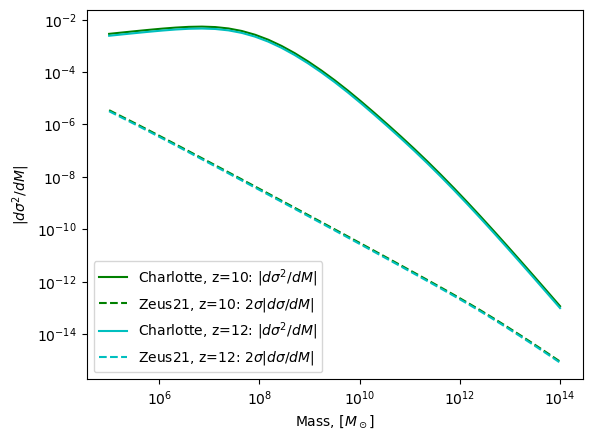

In [ ]:
fig9, ax9 = plt.subplots()

ax9.plot(hmfint.Mhtab,-dsigma2_10_eth,'g-',label='Charlotte, z=10: $|d\sigma^2/dM|$')
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10]*2*sigma_eth,'g--',label='Zeus21, z=10: 2$\sigma|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_12_eth,'c-',label='Charlotte, z=12: $|d\sigma^2/dM|$') 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,12]*2*sigma_eth,'c--',label='Zeus21, z=12: 2$\sigma|d\sigma/dM|$' ) 





plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma^2/dM|$")

(1e-13, 1e-08)

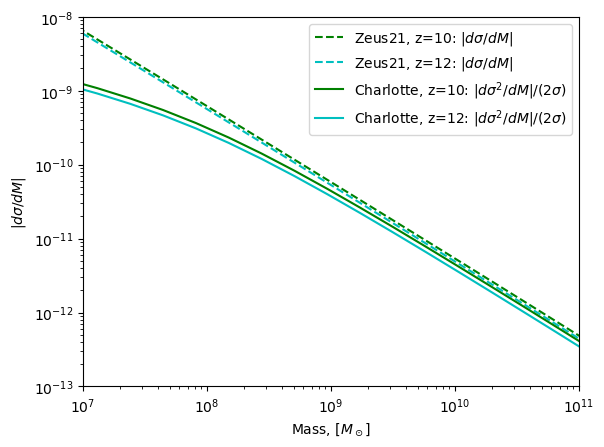

In [ ]:
fig9, ax9 = plt.subplots()




ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10],'g--',label='Zeus21, z=10: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,12],'c--',label='Zeus21, z=12: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_10/2/sigma,'g-',label='Charlotte, z=10: $|d\sigma^2/dM|/(2\sigma)$') 
ax9.plot(hmfint.Mhtab,-dsigma2_12/2/sigma,'c-',label='Charlotte, z=12: $|d\sigma^2/dM|/(2\sigma)$') 

plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma/dM|$")

plt.xlim(1e7, 1e11)
plt.ylim(1e-13,1e-8)

Text(0.5, 0, 'Mass, $[M_\\odot]$')

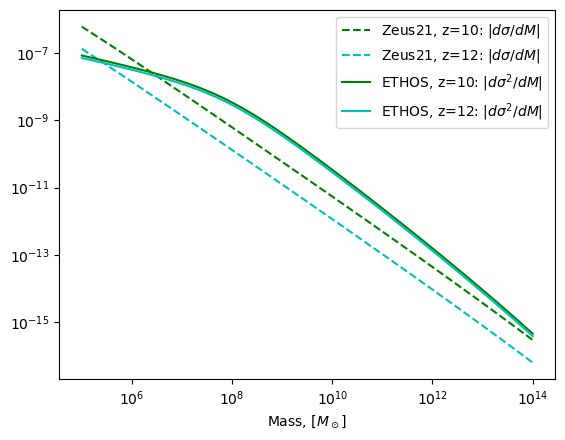

In [ ]:
fig9, ax9 = plt.subplots()




ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10],'g--',label='Zeus21, z=10: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,88],'c--',label='Zeus21, z=12: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_10,'g-',label='ETHOS, z=10: $|d\sigma^2/dM|$') 
ax9.plot(hmfint.Mhtab,-dsigma2_12,'c-',label='ETHOS, z=12: $|d\sigma^2/dM|$') 

plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")


In [ ]:
eth.sigma2_M(hmfint.Mhtab)

array([7.78498371, 7.7849837 , 7.7849837 , 7.78498369, 7.78498367,
       7.78498362, 7.78498353, 7.78498334, 7.78498294, 7.78498211,
       7.78498038, 7.7849768 , 7.78496935, 7.78495387, 7.7849217 ,
       7.78485486, 7.78471597, 7.78442739, 7.78382787, 7.7825827 ,
       7.77999801, 7.77463891, 7.76355387, 7.74073739, 7.69424345,
       7.60139472, 7.42310488, 7.10434293, 6.59692616, 5.90743568,
       5.11652169, 4.32504613, 3.59634569, 2.95300034, 2.39691931])